In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mplot

In [3]:
data=pd.read_csv('/content/spam.csv', encoding='latin1')

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data=data.drop([ 'Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data['v1'].value_counts()['spam']

np.int64(747)

In [9]:
data['v1_encoded'] = data['v1'].map({'ham': 0, 'spam': 1})
display(data.head())

,v1,v2,v1_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [10]:
data=data.drop(['v1'],axis=1)

In [11]:
data.head()

,v2,v1_encoded
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
import spacy

In [13]:
nlp=spacy.load('en_core_web_sm')

#PREPROCESSING

#Lemmatization


In [14]:
def lemmatization(text):
  doc=nlp(text)
  lemmaList=[token.lemma_ for token in doc]
  return ' '.join(lemmaList)

In [15]:
data['lemma']=data['v2'].apply(lemmatization)

In [16]:
data.head()

,v2,v1_encoded,lemma
0,"Go until jurong point, crazy.. Available only ...",0,"go until jurong point , crazy .. available onl..."
1,Ok lar... Joking wif u oni...,0,ok lar ... joke wif u oni ...
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...,0,u dun say so early hor ... u c already then sa...
4,"Nah I don't think he goes to usf, he lives aro...",0,"Nah I do not think he go to usf , he live arou..."


#Stop words


In [18]:
def removeStopwords(text):
  doc=nlp(text)
  no_stopwords=[token.text for token in doc if not token.is_stop and not token.is_punct]
  return ' '.join(no_stopwords)

In [19]:
data['preprocessed']=data['lemma'].apply(removeStopwords)

In [20]:
data.head()

,v2,v1_encoded,lemma,preprocessed
0,"Go until jurong point, crazy.. Available only ...",0,"go until jurong point , crazy .. available onl...",jurong point crazy available bugis n great wor...
1,Ok lar... Joking wif u oni...,0,ok lar ... joke wif u oni ...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win FA Cup final tkts 2...
3,U dun say so early hor... U c already then say...,0,u dun say so early hor ... u c already then sa...,u dun early hor u c
4,"Nah I don't think he goes to usf, he lives aro...",0,"Nah I do not think he go to usf , he live arou...",Nah think usf live


#Preprocessed Data

In [128]:
x=data['v2']
y=data['v1_encoded']

#Spliting into train and test dataset

In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [130]:
X_train.shape,X_test.shape

((4457,), (1115,))

#Model training

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV


In [147]:
from sklearn.pipeline import FeatureUnion

model = Pipeline([
    ('features', FeatureUnion([
        ('tfidf_word', TfidfVectorizer(analyzer='word', ngram_range=(1,2), max_df=0.9)),
        ('tfidf_char', TfidfVectorizer(analyzer='char', ngram_range=(3,5), max_features=20000))
    ])),
    ('clf', LogisticRegression(max_iter=1000,class_weight={0:1, 1:2.5}))
])


In [148]:
param_grid={
    'features__tfidf_word__ngram_range':[(1,1),(1,2)],
    'features__tfidf_char__ngram_range':[(3,5),(5,5)],
    'clf__C':[0.01,0.1,1,5,10],
    'clf__class_weight':[None,'balanced']
}

In [149]:
grid=GridSearchCV(model,
                  param_grid=param_grid,
                  scoring='f1',
                  cv=5,
                  n_jobs=-1)

#Creating 2nd pipeline for obfuscation

we work on raw data so that we can fix obfuscation that is hiding the actual words so that they r not detected as spam example:- c@sh

In [150]:
base_spam_templates = [
    "Free cash now",
    "Win prize today",
    "Congratulations you won",
    "Click here to claim",
    "Limited time offer"
]


In [151]:
import random
char_map={
    'a' : ['a','@','4'],
    'e' : ['e','3'],
    'i' : ['i','1'],
    'o' : ['o','0'],
    's' : ['s','$'],
    'l' : ['l','1'],
    't' : ['t','7']
}

def obfuscated_word(word):
  return ''.join (random.choice(char_map.get(c.lower(),[c])) for c in word)

def obfuscated_sentence(sentence):
  return ' '.join(obfuscated_word(word) for word in sentence.split())


In [152]:
synthetic_spam=[]

for sentence in base_spam_templates:
  for _ in range(5):
    synthetic_spam.append(obfuscated_sentence(sentence))

In [153]:
X_train_aug=pd.concat([X_train,pd.Series(synthetic_spam)],ignore_index=True)
y_train_aug=pd.concat([y_train, pd.Series([1]*len(synthetic_spam))],ignore_index=True)

In [154]:
grid.fit(X_train_aug, y_train_aug)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('tfidf_word',
                                                                        TfidfVectorizer(max_df=0.9,
                                                                                        ngram_range=(1,
                                                                                                     2))),
                                                                       ('tfidf_char',
                                                                        TfidfVectorizer(analyzer='char',
                                                                                        max_features=20000,
                                                                                        ngram_range=(3,
                                                                                                     5)))])),
                                       ('clf',
                                        LogisticRegression(class_weight={0: 1,
                                                                         1: 2.5},
                                                           max_iter=1000))]),
             n_jobs=-1,
             param_grid={'clf__C': [0.01, 0.1, 1, 5, 10],
                         'clf__class_weight': [None, 'balanced'],
                         'features__tfidf_char__ngram_range': [(3, 5), (5, 5)],
                         'features__tfidf_word__ngram_range': [(1, 1), (1, 2)]},
             scoring='f1')

In [155]:
best_model=grid.best_estimator_

In [156]:
y_pred = best_model.predict(X_test)


# Deploy

In [175]:
import joblib

joblib.dump(best_model,"spam_model.pkl")

['spam_model.pkl']

In [177]:
!ls


drive  sample_data  spam.csv  spam_model.pkl


intializing git

In [178]:
!git config --global user.name "GitNinja11"
!git config --global user.email "vaishnavinewalkar11@gmail.com"

In [186]:
!mkdir spam_project
!cd spam_project


In [190]:
import shutil

shutil.copy("/content/spam.csv",)
shutil.copy("/content/drive/MyDrive/Colab Notebooks/Copy of SpamDetection.ipynb")

TypeError: copy() missing 1 required positional argument: 'dst'

In [188]:
!git init
!git add .

Reinitialized existing Git repository in /content/.git/
error: open("drive/MyDrive/ (Responses).gsheet"): Operation not supported
error: unable to index file 'drive/MyDrive/ (Responses).gsheet'
fatal: adding files failed


In [ ]:
!git commit -m "Initial spam Detection model"

In [164]:
y_test[:5]

,v1_encoded
3245,0
944,0
1044,1
2484,0
812,1


In [165]:
y_pred[:5]

array([0, 0, 1, 0, 1])

In [166]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       965
           1       0.97      0.92      0.95       150

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



<Axes: >

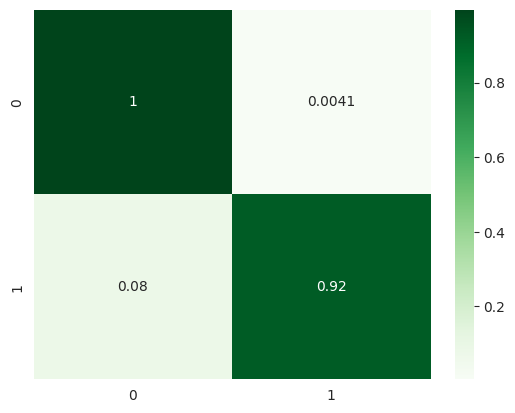

In [167]:
import seaborn as sns
sns.set_style('darkgrid')

cf=confusion_matrix(y_test,y_pred,normalize='true')
sns.heatmap(cf,annot=True,cmap='Greens')

In [168]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(
    y_test, y_pred, average='binary'
)

print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)


Precision: 0.971830985915493
Recall: 0.92
F1: 0.9452054794520548


In [169]:
samples = [
    "Fr33 cash waiting for you",
    "Congratulations!!! You won ₹5000",
    "Meeting postponed to 3 PM",
    "Click http://bit.ly/free-win",
    "Urgent call me asap"
]

best_model.predict(samples)

array([1, 1, 0, 1, 0])

In [170]:
best_model.predict_proba(samples)


array([[0.15115689, 0.84884311],
       [0.1223278 , 0.8776722 ],
       [0.94497361, 0.05502639],
       [0.01058176, 0.98941824],
       [0.82171951, 0.17828049]])

In [171]:
clear_spam = [
    "Win ₹10000 cash now",
    "Free recharge offer valid today",
    "Congratulations you have won a prize",
    "Click the link to claim your reward",
    "Urgent! You are selected for a lucky draw"
    "Fr33 c@sh av@ilable",
    "W1n big pr1ze now!!!",
    "Cl1ck h3re to g3t r3w@rd",
    "C0ngr@tul@tions!!! y0u w0n",
    "F R E E m 0 n e y"
    "Click http://bit.ly/claim-now",
    "Visit www.freecash.com today",
    "Limited offer at tinyurl.com/win",
    "Claim prize here https://offer.link",
    "Tap to redeem your coupon"

]


In [172]:
best_model.predict(clear_spam)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [146]:
best_model.predict_proba(clear_spam)

array([[0.00521023, 0.99478977],
       [0.25910096, 0.74089904],
       [0.01266751, 0.98733249],
       [0.02052732, 0.97947268],
       [0.22790244, 0.77209756],
       [0.14244299, 0.85755701],
       [0.76659879, 0.23340121],
       [0.55078022, 0.44921978],
       [0.01106676, 0.98893324],
       [0.18065084, 0.81934916],
       [0.30285229, 0.69714771],
       [0.00889308, 0.99110692],
       [0.60500502, 0.39499498]])